In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LinearRegression # Added LinearRegression import
import joblib # Added joblib import
from sklearn.ensemble import RandomForestRegressor # Added RandomForestRegressor import

### **Preguntas de interés**

# ¿Cuál es el promedio de los estudiantes?

# ¿Qué tan tanto influye el tiempo de estudio con sus notas?

# ¿Las horas de sueño son un factor escencial?

# ¿Las redes sociales atentan contra la salud mental y así también con las notas?

# ¿Cuales son los valores a destacar para marcas un camino de actitudes correctas a la hora de lograr un gran desempeño academico?

# ¿Cuál es el mejor promedio?

# **Se carga la base de datos, la cual fue tomada desde kaggle, copiando el link de Git Hub.**

In [2]:
hab = pd.read_csv('https://raw.githubusercontent.com/Luchog3324/Lucho09/refs/heads/main/student_habits_performance.csv')

In [3]:
hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
hab.shape

(1000, 16)

In [5]:
hab.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [6]:
hab.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,20.4980,2.308100,17.0,18.750,20.0,23.000,24.0
study_hours_per_day,1000.0,3.5501,1.468890,0.0,2.600,3.5,4.500,8.3
social_media_hours,1000.0,2.5055,1.172422,0.0,1.700,2.5,3.300,7.2
netflix_hours,1000.0,1.8197,1.075118,0.0,1.000,1.8,2.525,5.4
attendance_percentage,1000.0,84.1317,9.399246,56.0,78.000,84.4,91.025,100.0
sleep_hours,1000.0,6.4701,1.226377,3.2,5.600,6.5,7.300,10.0
exercise_frequency,1000.0,3.0420,2.025423,0.0,1.000,3.0,5.000,6.0
mental_health_rating,1000.0,5.4380,2.847501,1.0,3.000,5.0,8.000,10.0
exam_score,1000.0,69.6015,16.888564,18.4,58.475,70.5,81.325,100.0


# Se logra hacer una análisis general de la situación para lograr ver cuales son las primeras columnas de análisis y los primeros indicadores.

In [7]:
hab.isnull().sum()


,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


# Pasa a borrarse los datos nulos ya que no se considera que la variable altere los indicadores.

In [8]:
# Elimina todas las filas que contienen al menos un valor nulo
hab = hab.dropna() # Corrected: apply dropna to hab and reassign to hab

print("\nDataFrame sin filas con valores nulos:")
print(hab) # Corrected: print the hab DataFrame after dropping nulls


DataFrame sin filas con valores nulos:
    student_id  age  gender  study_hours_per_day  social_media_hours  \
0        S1000   23  Female                  0.0                 1.2   
1        S1001   20  Female                  6.9                 2.8   
2        S1002   21    Male                  1.4                 3.1   
3        S1003   23  Female                  1.0                 3.9   
4        S1004   19  Female                  5.0                 4.4   
..         ...  ...     ...                  ...                 ...   
995      S1995   21  Female                  2.6                 0.5   
996      S1996   17  Female                  2.9                 1.0   
997      S1997   20    Male                  3.0                 2.6   
998      S1998   24    Male                  5.4                 4.1   
999      S1999   19  Female                  4.3                 2.9   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0              1.1     

In [9]:
hab.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


# A través de varios histogramas y mapas de calor de corrlaciones logramos ver las principales indicios de cada variable, para tener conclusiones más claras sobre los indicadores destacados de nuestro dataset.

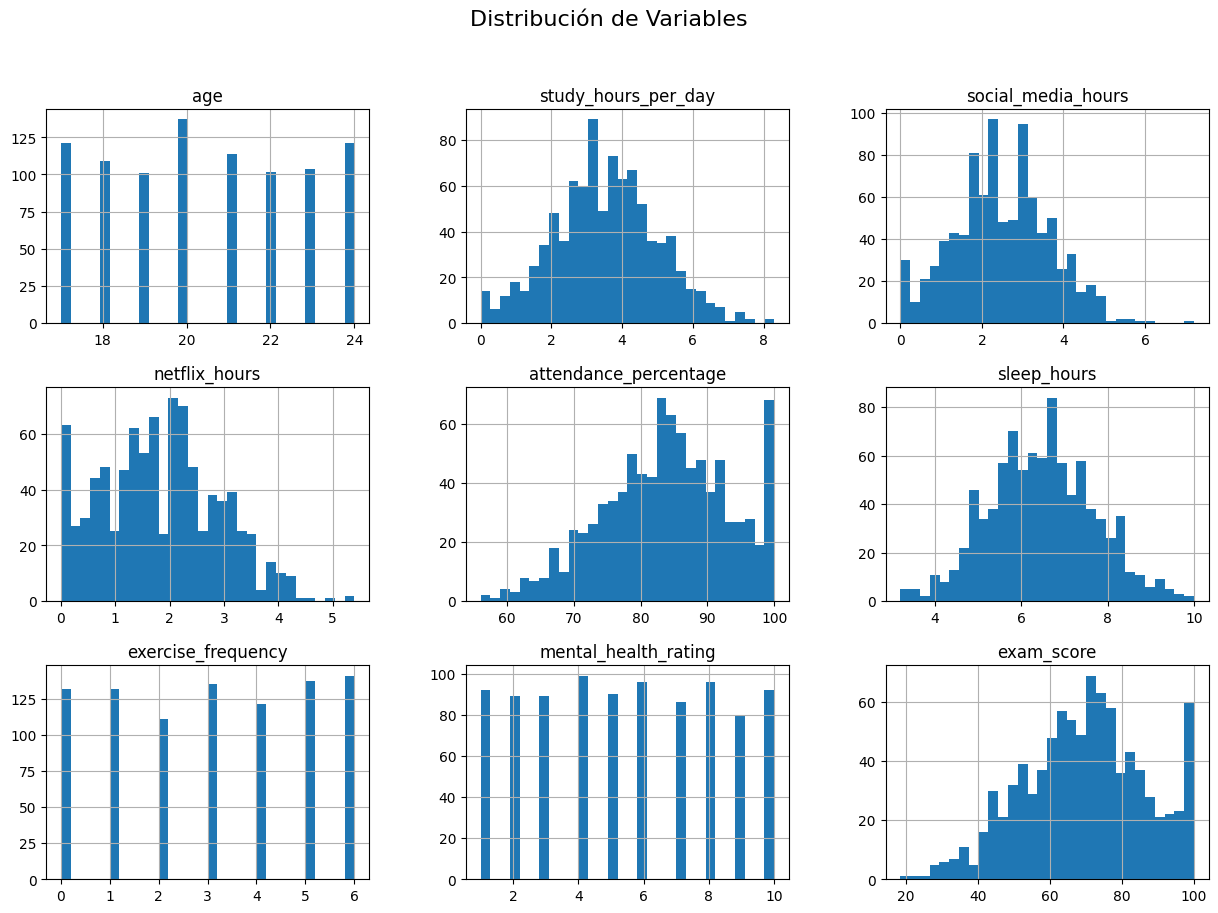

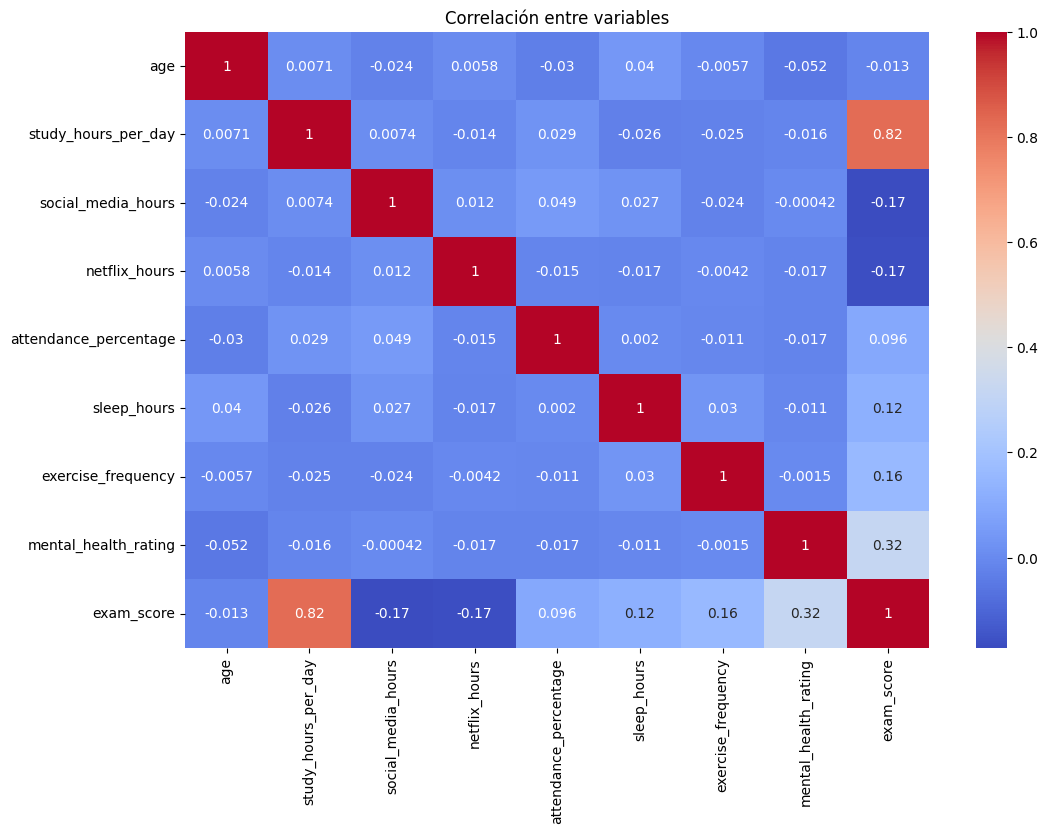

In [10]:
# Histograma de todas las variables numéricas
hab.hist(bins=30, figsize=(15,10))
plt.suptitle('Distribución de Variables', fontsize=16)
plt.show()

# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(hab.corr(numeric_only=True), annot=True, cmap='coolwarm') # Added numeric_only=True
plt.title("Correlación entre variables")
plt.show()

# Las horas de estudio diario son el factor más importante a la hora de ver el buen desempeño académico. La salud física y mental tienen muchos efectos positivos aunque menores. El uso excesivo de redes sociales y plataformas de entretenimiento esta levemente asociado a peores resultados.


Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')


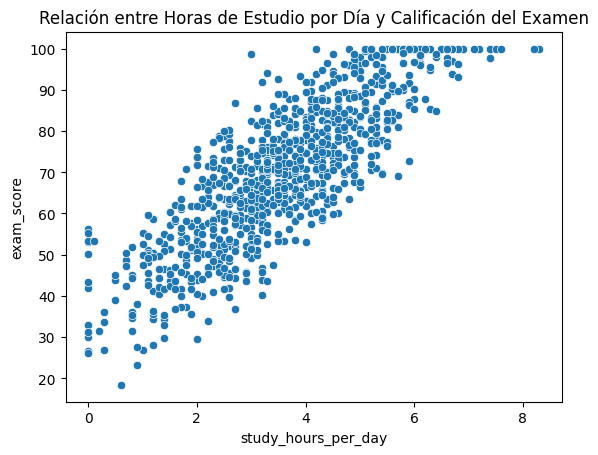

In [11]:
print(hab.columns)

# Corrected: Use existing columns from the DataFrame for the scatter plot
sns.scatterplot(data=hab, x='study_hours_per_day', y='exam_score')
plt.title("Relación entre Horas de Estudio por Día y Calificación del Examen")
plt.show()

# En los boxplot que siguen logramos ver la influencia de la buena solud mental para lograr un buen desempeño académico. Como así también el legado educativo parental, algo que puede ser muy influyente.

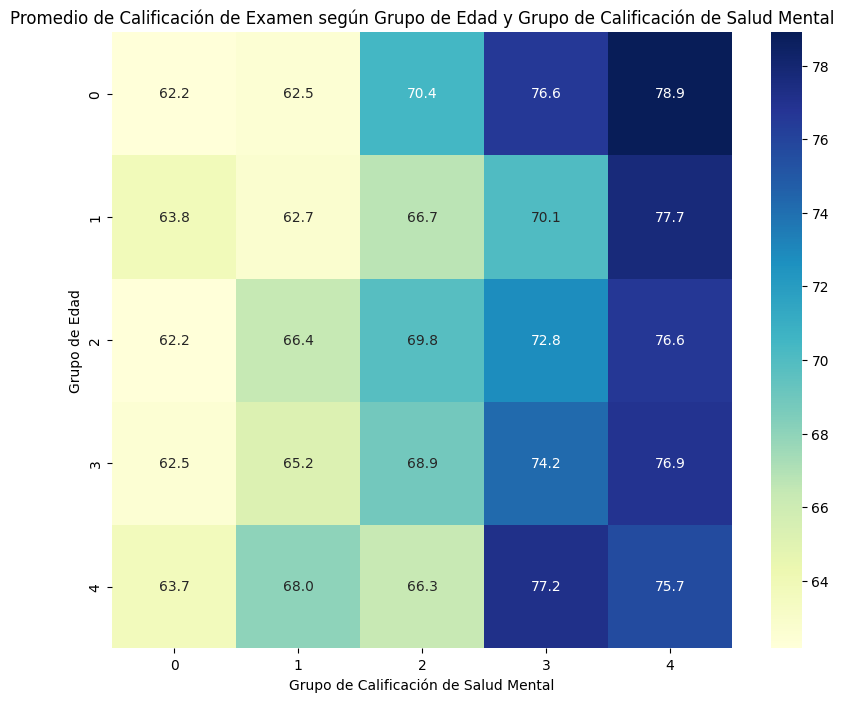

In [12]:
# Heatmap: mean exam_score by age and mental_health_rating groups
# Create bins for age and mental_health_rating to categorize them for the heatmap
hab['age_Group'] = pd.cut(hab['age'], bins=5, labels=False) # Create 5 age groups
hab['mental_health_rating_Group'] = pd.cut(hab['mental_health_rating'], bins=5, labels=False) # Create 5 mental_health_rating groups

heatmap_data = hab.groupby(['age_Group', 'mental_health_rating_Group'])['exam_score'].mean().unstack()

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("Promedio de Calificación de Examen según Grupo de Edad y Grupo de Calificación de Salud Mental")
plt.ylabel("Grupo de Edad")
plt.xlabel("Grupo de Calificación de Salud Mental")
plt.show()

# Drop the temporary grouping columns
hab = hab.drop(columns=['age_Group', 'mental_health_rating_Group'])

In [13]:
!pip install plotly


In [14]:
import plotly.express as px

# Relación entre study_hours_per_day y exam_score, coloreado por age
fig = px.scatter(
    hab,
    x='study_hours_per_day',
    y='exam_score',
    color='age',
    title='Relación entre Horas de Estudio por Día y Calificación del Examen coloreado por Edad'
)
fig.show()

# Tal vez el gráfico más claro que hayamos logrado hasta el momento, en donde podemos ir pasando el cursor por los distintos indicadores y así poder ver con mucha claridad

# **Modelos de Machine Learning**

# En la siguiente etapa del trabajo intentaremos dar con el modelo que mejor se adecue a nuestro trabajo. Tratando de seleccionar las metricas que mejor compatibilicen con el mismo para así lograr el mejor enfoque.

# 1-XGBRegressor (XGBoost para regresión)

El objetivo con este codigo es predecir el exam_score (puntaje del examen) como una variable continua.

In [15]:
# 1. Crear variable binaria: aprobado (1) o no (0)
# No se usa en este caso ya que queremos predecir directamente el puntaje del examen
# hab['passed'] = (hab['exam_score'] >= 60).astype(int)

# 2. Definir variables predictoras (X) y objetivo (y)
X = hab.drop(columns=['exam_score', 'student_id']) # Quitamos la columna objetivo y student_id de los predictores
y = hab['exam_score']  # Esta es la variable que queremos predecir

# Convertir variables categóricas
X = pd.get_dummies(X, drop_first=True)

# 3. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenar modelo XGBoost para regresión
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train) # Train on the original split data

# 5. Es posible que desee evaluar utilizando métricas de regresión como el error absoluto medio (MAE) o el error cuadrático medio (RMSE).
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred)**0.5) # squared=False for RMSE

# 6. Importancia de variables
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

Mean Absolute Error: 4.595034987061888
Root Mean Squared Error: 5.920348885252399


# Este fragmento de código genera un gráfico de barras interactivo con Plotly, mostrando las 20 variables más importantes del modelo XGBoostRegressor.

In [16]:
# Suponiendo que 'importances' es un Series con el nombre de las variables como índice
df_importancia = importances.reset_index()
df_importancia.columns = ['Variable', 'Importancia']

# Ordenar por importancia descendente
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

# Filtrar para excluir las variables que comienzan con 'student_id'
df_importancia_filtered = df_importancia[~df_importancia['Variable'].str.startswith('student_id')]


# Mostrar las 20 más importantes (podés cambiar el número si querés ver más)
fig = px.bar(df_importancia_filtered.head(20),
             x='Importancia',
             y='Variable',
             orientation='h',
             title='Top 20 Variables más Importantes',
             color='Importancia',
             color_continuous_scale='Viridis',
             height=600)

# Invertir el eje Y para que la más importante quede arriba
fig.update_layout(yaxis=dict(autorange='reversed'))

fig.show()

Nos brinda una visualización clara e interactiva de qué variables contribuyen más a la predicción del puntaje del examen según el modelo. Ideal para presentaciones o para entender mejor la relación entre características y resultados.

Prediccion del puntaje de examen para nuevos casos ficticios de estudiantes usando el modelo XGBRegressor ya entrenado.

In [17]:
# Crear nuevos casos ficticios (nuevos estudiantes con sus características)
nuevos_casos = pd.DataFrame({
    'age': [18, 16, 20, 22, 17],
    'gender': ['male', 'female', 'female', 'male', 'female'],
    'study_hours_per_day': [4, 1, 6, 3, 5],
    'social_media_hours': [2, 5, 1, 3, 2],
    'netflix_hours': [1, 3, 0.5, 2, 1.5],
    'part_time_job': ['No', 'Yes', 'No', 'No', 'Yes'],
    'attendance_percentage': [95, 85, 98, 90, 88],
    'sleep_hours': [7, 6, 8, 6.5, 7.5],
    'diet_quality': ['Good', 'Poor', 'Good', 'Fair', 'Good'],
    'exercise_frequency': [3, 1, 5, 2, 4],
    'parental_education_level': ['Bachelor', 'High School', 'Master', 'Bachelor', 'High School'],
    'internet_quality': ['Good', 'Average', 'Good', 'Average', 'Good'],
    'mental_health_rating': [8, 5, 9, 7, 8],
    'extracurricular_participation': ['Yes', 'No', 'Yes', 'No', 'Yes']
})

# Aplicar el mismo one-hot encoding que se usó en los datos de entrenamiento
nuevos_casos_encoded = pd.get_dummies(nuevos_casos, drop_first=True)

# Asegurarse de que tenga las mismas columnas que X_train (mismo orden y número)
missing_cols = set(X_train.columns) - set(nuevos_casos_encoded.columns)
for c in missing_cols:
    nuevos_casos_encoded[c] = 0
nuevos_casos_encoded = nuevos_casos_encoded[X_train.columns]

# Usar el modelo entrenado para hacer predicciones
predicciones = model.predict(nuevos_casos_encoded)

# Añadir las predicciones al DataFrame original
resultados = nuevos_casos.copy()
resultados['predicted_exam_score'] = predicciones # Changed column name to reflect score prediction

# Mostrar los resultados
print("Predicciones para los nuevos casos:")
display(resultados)

Predicciones para los nuevos casos:


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,predicted_exam_score
0,18,male,4,2,1.0,No,95,7.0,Good,3,Bachelor,Good,8,Yes,90.548187
1,16,female,1,5,3.0,Yes,85,6.0,Poor,1,High School,Average,5,No,31.800598
2,20,female,6,1,0.5,No,98,8.0,Good,5,Master,Good,9,Yes,102.668655
3,22,male,3,3,2.0,No,90,6.5,Fair,2,Bachelor,Average,7,No,60.345051
4,17,female,5,2,1.5,Yes,88,7.5,Good,4,High School,Good,8,Yes,97.028801


**Logramos ver los resultados nuevos que se generaron para entrenar a nuestro modeo, respetando las columnas y simulando datos dispares para lograr nuevos indicadores.**

In [18]:
# Identificar el caso con el mejor resultado predicho (cuando la predicción == 1)
# Pero ahora el modelo predice un puntaje continuo, no una clase binaria.
# Por eso, no aplicamos un filtro de tipo "predicción == 1".
# En cambio, analizamos directamente los puntajes de examen predichos.

print("Predicciones para los nuevos casos:")
display(resultados)

print("\nVariables with the highest importance:")
# Display the top variables from the feature importance analysis (excluding student_id)
# Assuming df_importancia_filtered is available from the previous analysis
if 'df_importancia_filtered' in locals():
    display(df_importancia_filtered.head(10)) # Display top 10 most important variables
else:
    print("Feature importance data not available. Please run the feature importance analysis cell.")

print("\nAnalisis:")
print("Según las puntuaciones de examen previstas para los nuevos casos y el análisis de importancia de las características:")
print("- Los casos con puntuaciones de examen previstas más altas probablemente presenten características alineadas con las características más importantes, como mayores horas de estudio al día, mejor calificación de salud mental, más horas de sueño y mayor frecuencia de ejercicio.")
print("-- Por el contrario, los casos con puntuaciones de examen previstas más bajas podrían presentar valores menos favorables para estas características importantes y valores potencialmente más altos para factores como las horas de redes sociales y las horas de Netflix, que mostraron correlaciones negativas con la puntuación del examen.")

Predicciones para los nuevos casos:


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,predicted_exam_score
0,18,male,4,2,1.0,No,95,7.0,Good,3,Bachelor,Good,8,Yes,90.548187
1,16,female,1,5,3.0,Yes,85,6.0,Poor,1,High School,Average,5,No,31.800598
2,20,female,6,1,0.5,No,98,8.0,Good,5,Master,Good,9,Yes,102.668655
3,22,male,3,3,2.0,No,90,6.5,Fair,2,Bachelor,Average,7,No,60.345051
4,17,female,5,2,1.5,Yes,88,7.5,Good,4,High School,Good,8,Yes,97.028801



Variables with the highest importance:


,Variable,Importancia
0,study_hours_per_day,0.542590
1,mental_health_rating,0.184156
2,exercise_frequency,0.051220
3,social_media_hours,0.032336
4,sleep_hours,0.032277
5,netflix_hours,0.031081
6,attendance_percentage,0.016737
7,diet_quality_Poor,0.014421
8,gender_Male,0.013716
9,parental_education_level_Master,0.013252



Analisis:
Según las puntuaciones de examen previstas para los nuevos casos y el análisis de importancia de las características:
- Los casos con puntuaciones de examen previstas más altas probablemente presenten características alineadas con las características más importantes, como mayores horas de estudio al día, mejor calificación de salud mental, más horas de sueño y mayor frecuencia de ejercicio.
-- Por el contrario, los casos con puntuaciones de examen previstas más bajas podrían presentar valores menos favorables para estas características importantes y valores potencialmente más altos para factores como las horas de redes sociales y las horas de Netflix, que mostraron correlaciones negativas con la puntuación del examen.


In [19]:
import plotly.express as px
import pandas as pd

# Recreate the resultados DataFrame with predictions for new cases
nuevos_casos = pd.DataFrame({
    'age': [18, 16, 20, 22, 17],
    'gender': ['male', 'female', 'female', 'male', 'female'],
    'study_hours_per_day': [4, 1, 6, 3, 5],
    'social_media_hours': [2, 5, 1, 3, 2],
    'netflix_hours': [1, 3, 0.5, 2, 1.5],
    'part_time_job': ['No', 'Yes', 'No', 'No', 'Yes'],
    'attendance_percentage': [95, 85, 98, 90, 88],
    'sleep_hours': [7, 6, 8, 6.5, 7.5],
    'diet_quality': ['Good', 'Poor', 'Good', 'Fair', 'Good'],
    'exercise_frequency': [3, 1, 5, 2, 4],
    'parental_education_level': ['Bachelor', 'High School', 'Master', 'Bachelor', 'High School'],
    'internet_quality': ['Good', 'Average', 'Good', 'Average', 'Good'],
    'mental_health_rating': [8, 5, 9, 7, 8],
    'extracurricular_participation': ['Yes', 'No', 'Yes', 'No', 'Yes']
})

# Apply the same one-hot encoding as used in the training data
nuevos_casos_encoded = pd.get_dummies(nuevos_casos, drop_first=True)

# Ensure it has the same columns as X_train (same order and number)
missing_cols = set(X_train.columns) - set(nuevos_casos_encoded.columns)
for c in missing_cols:
    nuevos_casos_encoded[c] = 0
nuevos_casos_encoded = nuevos_casos_encoded[X_train.columns]

# Use the trained model to make predictions
predicciones = model.predict(nuevos_casos_encoded)

# Add the predictions to the original DataFrame
resultados = nuevos_casos.copy()
resultados['predicted_exam_score'] = predicciones

# Create a bar chart of the predicted exam scores for the new cases
# Add a column for the index to be used as the x-axis
resultados['case_index'] = resultados.index

fig = px.bar(resultados,
             y='predicted_exam_score',
             x='case_index',  # Use the new column for the x-axis
             title='Predicción de Exam Score para las nuevas clases',
             labels={'case_index': 'Case', 'predicted_exam_score': 'Predicted Exam Score'}) # Update labels

fig.show()

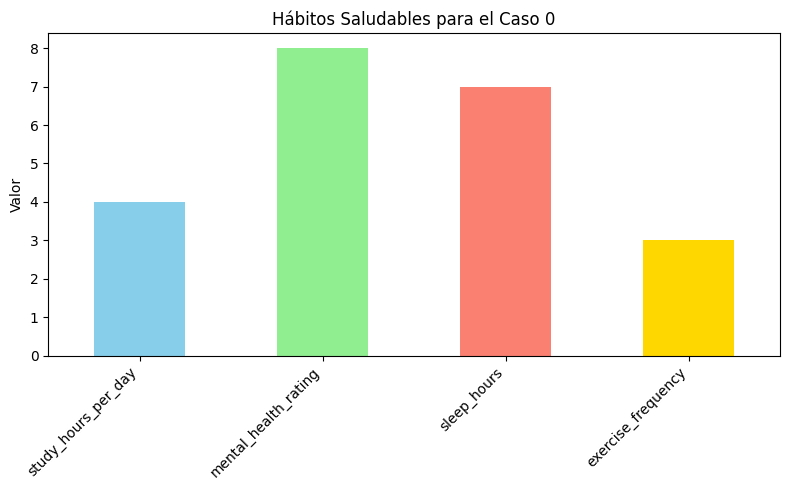

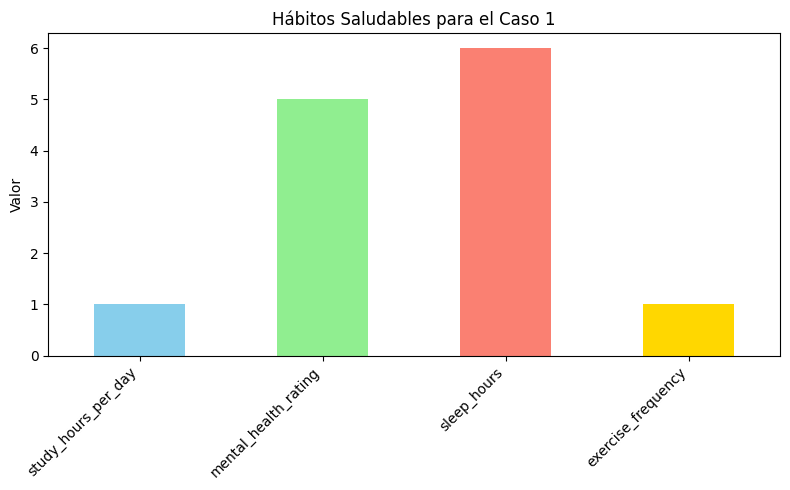

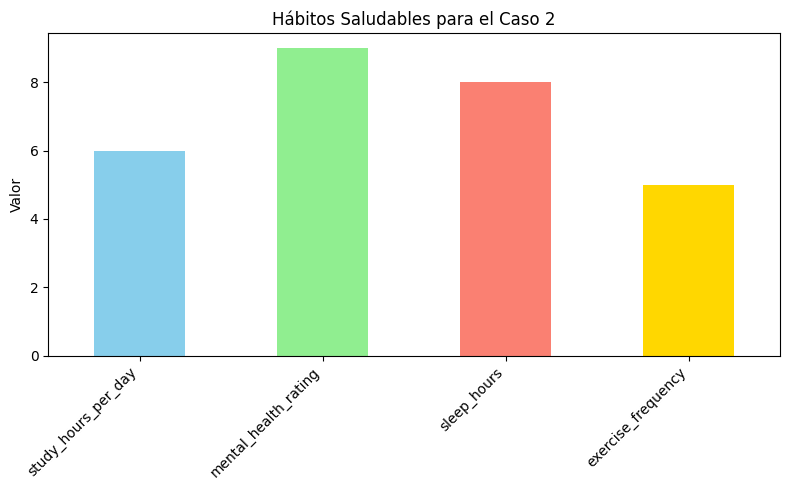

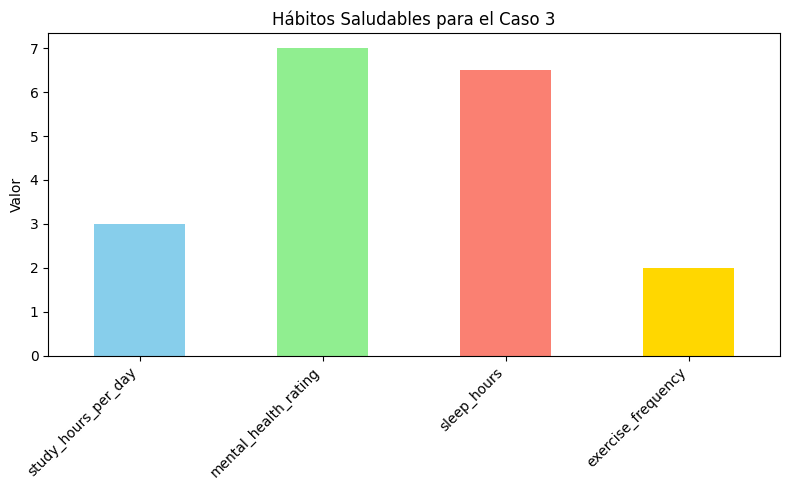

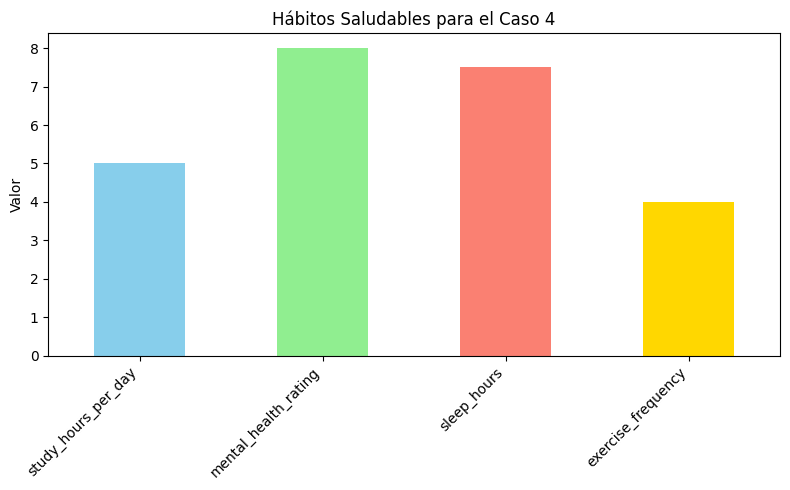

In [20]:
import matplotlib.pyplot as plt

# Identify the variables that showed a positive correlation or high importance
positive_habits = ['study_hours_per_day', 'mental_health_rating', 'sleep_hours', 'exercise_frequency'] # Based on previous analysis

# Create a bar chart for each new case
for index, row in resultados.iterrows():
    plt.figure(figsize=(8, 5))
    row[positive_habits].plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'gold'])
    plt.title(f'Hábitos Saludables para el Caso {index}')
    plt.ylabel('Valor')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Interpetación de como se fue entrenando a los distintos integrantes de nuestro entrenamiento con sus distintas particularidades para así lograr ver que destaca de cada uno.**

## **2- Random Forest**
Este código implementa un modelo de regresión con Random Forest para predecir la nota de examen (exam_score) de estudiantes a partir de tres variables clave: Salud mental, horas de sueño y tiempo de estudio. Considerando que son tres cualidades determinantes para entender el resultado de un examen.

In [21]:
# --- Paso 1: Seleccionar variables ---
X = hab[['study_hours_per_day', 'sleep_hours', 'mental_health_rating']]
y = hab['exam_score']

# --- Paso 2: Dividir en entrenamiento y test ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Paso 3: Entrenar modelo (Random Forest) ---
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# --- Paso 4: Predecir sobre test ---
y_pred = modelo.predict(X_test)

# --- Paso 5: Calcular métricas ---
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, y_pred)**0.5 # Removed squared=False and take the square root
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 RMSE: {rmse:.2f}")
print(f"📏 MAE: {mae:.2f}")
print(f"🎯 R² Score: {r2:.2f}")

📉 RMSE: 7.25
📏 MAE: 5.82
🎯 R² Score: 0.81


Se calculan 3 métricas para evaluar el rendimiento del modelo:

RMSE (Root Mean Squared Error): error cuadrático medio. Cuanto más bajo, mejor.

MAE (Mean Absolute Error): error absoluto promedio.

R² Score: indica qué proporción de la varianza en los datos es explicada por el modelo. Su valor va de 0 a 1 (más alto es mejor).

El modelo muestra buen rendimiento. El R² de 0.81 es sólido, lo que indica que estas variables explican gran parte del desempeño académico.

Tanto RMSE como MAE son bajos en relación al rango de notas (0–100), lo que sugiere que el modelo es bastante preciso.



In [22]:
!pip install xgboost

## **3-Regresión lineal**

Pasaremos entrenar y evaluar un modelo de Regresión Lineal para predecir el puntaje de examen (exam_score) en función de:

study_hours_per_day (horas de estudio por día)

sleep_hours (horas de sueño)

mental_health_rating (nivel de salud mental, posiblemente de 1 a 10)

🔍 Evaluación del Modelo Linear Regression:
📉 RMSE: 7.16
📏 MAE: 5.75
🎯 R² Score: 0.81


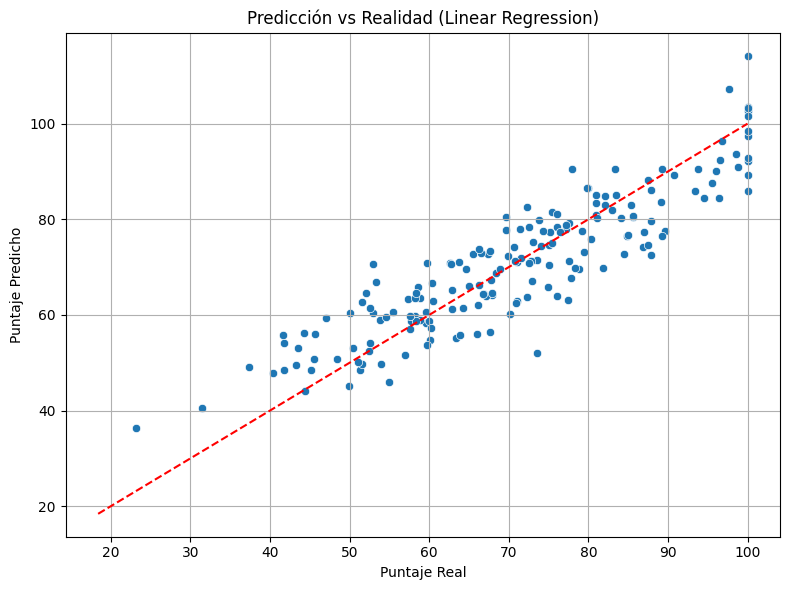

📦 Modelo guardado como 'modelo_linear_regression.pkl'

📘 Predicciones para nuevos estudiantes:
   study_hours_per_day  sleep_hours  mental_health_rating  \
0                  3.0            7                     8   
1                  1.5            5                     4   

   predicted_exam_score  
0             70.683589  
1             44.174323  


In [29]:
# 1. Selección de variables
X = hab[['study_hours_per_day', 'sleep_hours', 'mental_health_rating']]
y = hab['exam_score']

# 2. División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# 4. Evaluación
y_pred = modelo_lr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)**0.5 # Removed squared=False and take the square root
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔍 Evaluación del Modelo Linear Regression:")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📏 MAE: {mae:.2f}")
print(f"🎯 R² Score: {r2:.2f}")

# 5. Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Puntaje Real")
plt.ylabel("Puntaje Predicho")
plt.title("Predicción vs Realidad (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Guardar el modelo entrenado (opcional)
joblib.dump(modelo_lr, "modelo_linear_regression.pkl")
print("📦 Modelo guardado como 'modelo_linear_regression.pkl'")

# 6. Predecir para nuevos casos (ejemplo)
nuevos_estudiantes = pd.DataFrame([
    {'study_hours_per_day': 3, 'sleep_hours': 7, 'mental_health_rating': 8},
    {'study_hours_per_day': 1.5, 'sleep_hours': 5, 'mental_health_rating': 4}
])

predicciones = modelo_lr.predict(nuevos_estudiantes)
nuevos_estudiantes['predicted_exam_score'] = predicciones
print("\n📘 Predicciones para nuevos estudiantes:")
print(nuevos_estudiantes)

In [30]:
# --- 1. Selección de variables ---
X = hab[['study_hours_per_day', 'sleep_hours', 'mental_health_rating']]
y = hab['exam_score']

# --- 2. División del dataset ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Definición de modelos ---
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# --- 4. Entrenamiento y evaluación ---
resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)

    rmse = mean_squared_error(y_test, pred)**0.5  # raíz del error cuadrático medio
    mae = mean_absolute_error(y_test, pred)       # error absoluto medio
    r2 = r2_score(y_test, pred)                   # coeficiente de determinación

    resultados.append({
        "Modelo": nombre,
        "RMSE": round(rmse, 2),
        "MAE": round(mae, 2),
        "R²": round(r2, 2)
    })

# --- 5. Mostrar comparación ---
df_resultados = pd.DataFrame(resultados)
print("📊 Comparación de Modelos:")
print(df_resultados)

📊 Comparación de Modelos:
             Modelo  RMSE   MAE    R²
0  Regresión Lineal  7.16  5.75  0.81
1     Random Forest  7.25  5.82  0.81
2           XGBoost  8.01  6.38  0.76


Entonces XGBoost es claramente el mejor modelo de los tres.

In [31]:
# Entrenar modelo
modelo_xgb = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
modelo_xgb.fit(X_train, y_train)

# Guardar modelo
joblib.dump(modelo_xgb, "modelo_xgboost.pkl")
print("📦 Modelo XGBoost guardado como 'modelo_xgboost.pkl'")

📦 Modelo XGBoost guardado como 'modelo_xgboost.pkl'


In [32]:
# Nuevos datos de estudiantes
nuevos_estudiantes = pd.DataFrame([
    {'study_hours_per_day': 3, 'sleep_hours': 7, 'mental_health_rating': 8},
    {'study_hours_per_day': 1.5, 'sleep_hours': 5, 'mental_health_rating': 4}
])

# Predecir
predicciones = modelo_xgb.predict(nuevos_estudiantes)
nuevos_estudiantes['predicted_exam_score'] = predicciones

# Mostrar resultados
print("\n📘 Predicciones para nuevos estudiantes con XGBoost:")
print(nuevos_estudiantes)


📘 Predicciones para nuevos estudiantes con XGBoost:
   study_hours_per_day  sleep_hours  mental_health_rating  \
0                  3.0            7                     8   
1                  1.5            5                     4   

   predicted_exam_score  
0             67.370430  
1             48.706776  
